In [1]:
from scipy import stats
from math import pi
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

### **CARGAR E INSPECCIONAR LOS DATOS**

In [2]:
GBvideos_original = pd.read_csv('../data/GBvideos_cc50_202101.csv')
GBvideos_procesada = pd.read_csv('../data/GBvideos_cc50_202101.csv')

GBvideos_procesada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38916 non-null  object 
 1   trending_date           38916 non-null  object 
 2   title                   38916 non-null  object 
 3   channel_title           38916 non-null  object 
 4   category_id             38916 non-null  int64  
 5   publish_time            38916 non-null  object 
 6   tags                    38916 non-null  object 
 7   views                   38916 non-null  int64  
 8   likes                   38916 non-null  int64  
 9   dislikes                38916 non-null  int64  
 10  comment_count           38916 non-null  int64  
 11  thumbnail_link          38916 non-null  object 
 12  comments_disabled       38916 non-null  bool   
 13  ratings_disabled        38916 non-null  bool   
 14  video_error_or_removed  38916 non-null

In [3]:
GBvideos_procesada.head(7)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529)
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526)
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486)
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797)
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135)
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,Kent,51.133712,1.300013,POINT (1.300013386 51.13371218)
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Swansea,51.629987,-3.950002,POINT (-3.950002077 51.6299868)


# **PRE-PROCESAR LOS DATOS**

### **CREANDO LA COLUMNA DE CATEGORIA**

In [5]:
GB_category_id = pd.read_json('../data/GB_category_id.json')
category = {}
for item in GB_category_id["items"]:
  category[item["id"]] = item["snippet"]["title"]

#GBvideos_procesada["category"] = GBvideos_procesada["category_id"].map(category)

GBvideos_procesada["category"] = [category.get(str(id)) for id in GBvideos_procesada["category_id"]]

In [6]:
GBvideos_procesada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38916 non-null  object 
 1   trending_date           38916 non-null  object 
 2   title                   38916 non-null  object 
 3   channel_title           38916 non-null  object 
 4   category_id             38916 non-null  int64  
 5   publish_time            38916 non-null  object 
 6   tags                    38916 non-null  object 
 7   views                   38916 non-null  int64  
 8   likes                   38916 non-null  int64  
 9   dislikes                38916 non-null  int64  
 10  comment_count           38916 non-null  int64  
 11  thumbnail_link          38916 non-null  object 
 12  comments_disabled       38916 non-null  bool   
 13  ratings_disabled        38916 non-null  bool   
 14  video_error_or_removed  38916 non-null

In [7]:
GBvideos_procesada.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,...,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics


### **TRANSFORMACION DE TIPO DE VARIABLES**

In [8]:
# Cambiando la columna trending_date a tipo datetime
GBvideos_procesada['trending_date'] = pd.to_datetime(GBvideos_procesada['trending_date'], format="%y.%d.%m")

# Cambiando la columna publish_time a tipo datetime y creando la columna publish_hour

lsttime = []
lsthour = []
for i in range(len(GBvideos_procesada)):
  time, hour = GBvideos_procesada['publish_time'][i].split("T")
  lsttime.append(time)
  lsthour.append(hour)

GBvideos_procesada['publish_hour'] = pd.to_datetime(lsthour, format="%H:%M:%S.000Z")
GBvideos_procesada['publish_hour'] = GBvideos_procesada["publish_hour"].dt.strftime('%H:%M:%S')
GBvideos_procesada['publish_time'] = pd.to_datetime(lsttime, format="%Y-%m-%d")

In [9]:
GBvideos_procesada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                38916 non-null  object        
 1   trending_date           38916 non-null  datetime64[ns]
 2   title                   38916 non-null  object        
 3   channel_title           38916 non-null  object        
 4   category_id             38916 non-null  int64         
 5   publish_time            38916 non-null  datetime64[ns]
 6   tags                    38916 non-null  object        
 7   views                   38916 non-null  int64         
 8   likes                   38916 non-null  int64         
 9   dislikes                38916 non-null  int64         
 10  comment_count           38916 non-null  int64         
 11  thumbnail_link          38916 non-null  object        
 12  comments_disabled       38916 non-null  bool  

In [10]:
GBvideos_procesada.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category,publish_hour
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style,07:38:29
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment,06:24:44
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music,17:00:03
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports,02:30:38
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13,[none],9815,30,2,...,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics,01:45:13


### **TRANSFORMACION DE VALORES NaN**

In [11]:
def verificar_NaN(GBvideos_procesada):
  cont = 0
  for columna in GBvideos_procesada.columns:
    a = GBvideos_procesada[columna].isna()
    if sum(a) != 0:
      print(f"En la columna {columna} se han encontrado {sum(a)} valores NaN")
    else:
      cont += 1

  if cont == len(GBvideos_procesada.columns):
    print("No se han encontrado columnas con valores NaN")

def Nuevo_Valor(columna,df):
  b = randint(0,len(df)-1)
  while (df[columna].get(b) == np.nan or df[columna].get(b) == '[none]'):
    b = randint(0,len(df)-1)
  return df[columna].get(b)

def Modificar_valores_NaN(columna,df):
  df[columna].fillna(value= Nuevo_Valor(columna,df),inplace = True)  
  return df[columna]

def Verificar_None(GBvideos_procesada):
  cont0 = 0
  for columna in GBvideos_procesada.columns:
    cont = 0
    for i in range(len(GBvideos_procesada)):
      if GBvideos_procesada[columna].get(i) == '[none]':
        cont += 1
    if cont != 0:
      print(f"En la columna {columna} se han encontrado {cont} valores None")
    else:
      cont0 += 1
  
  if cont0 == len(GBvideos_procesada.columns):
    print("No se han encontrado columnas con valores None")

def Remplazar_None(columna,df):
  for i in range(len(df[columna])):
      if df[columna].get(i) == '[none]':
        df.at[i, columna] = Nuevo_Valor(columna,df)
  return df[columna]

In [12]:
#en esta parte eliminamos todas las filas que contengan valores NaN en la columna Video_id
GBvideos_procesada.dropna(axis=1)

#en esta parte verificamos que la columna Video_id ya no tenga valores NaN y cuales aun tienen
verificar_NaN(GBvideos_procesada)
print()

#Sabiendo que columnnas contienen los valores NaN procedemos a remplazarlos con la funcion Modificar_valores_NaN 
#que remplaza cada valor con otro aleatorio de la columna siempre y cuando no sea otro NaN
GBvideos_procesada['category'] = Modificar_valores_NaN('category',GBvideos_procesada)
GBvideos_procesada['description'] = Modificar_valores_NaN('description',GBvideos_procesada)
verificar_NaN(GBvideos_procesada)
print()

#Ya que los [none] no se consideran valores NaN utilizaremos replace para remplazarlo con otro de los valores en la lista
Verificar_None(GBvideos_procesada)
GBvideos_procesada['tags'] = Remplazar_None('tags', GBvideos_procesada)
Verificar_None(GBvideos_procesada)

En la columna description se han encontrado 612 valores NaN
En la columna category se han encontrado 90 valores NaN

No se han encontrado columnas con valores NaN

En la columna tags se han encontrado 2010 valores None
No se han encontrado columnas con valores None


In [13]:
GBvideos_procesada.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category,publish_hour
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style,07:38:29
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment,06:24:44
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music,17:00:03
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports,02:30:38
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13,"Drake|""Nice""|""For""|""What""|""Young""|""Money""|""Hip...",9815,30,2,...,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics,01:45:13


### **TRANSFORMACION DE OUTLIERS**

In [14]:
def fix_outliers(df,columna):
  #calculamos los quantiles por arribadel 5% y por debajo del 95%
  media = (df[columna]).mean()
  mediana = (df[columna]).median()
  deciles = np.arange(1,20) *5
  deciles_dist = [np.percentile(df[columna], dec) for dec in deciles]
  for i in range(len(df[columna])):
    if (df[columna].get(i) <deciles_dist[0]):
      df.at[i,columna] = round(media)
    if (df[columna].get(i) >deciles_dist[len(deciles_dist) - 1]):
       df.at[i,columna] = round(mediana)
  return df[columna]

In [16]:
GBvideos_procesada['likes'] = fix_outliers(GBvideos_procesada,'likes')
GBvideos_procesada['dislikes'] = fix_outliers(GBvideos_procesada,'dislikes')
GBvideos_procesada['views'] = fix_outliers(GBvideos_procesada,'views')

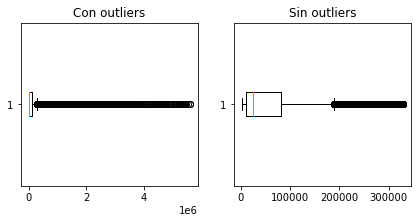

In [17]:
plt.subplots(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.boxplot(GBvideos_original["likes"], vert=False)
plt.title("Con outliers")
plt.axis("on")
plt.subplot(1, 2, 2)
plt.boxplot(GBvideos_procesada["likes"], vert=False)
plt.title("Sin outliers")
plt.axis("on")
plt.show()

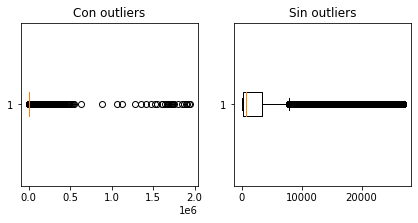

In [18]:
plt.subplots(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.boxplot(GBvideos_original["dislikes"], vert=False)
plt.title("Con outliers")
plt.axis("on")
plt.subplot(1, 2, 2)
plt.boxplot(GBvideos_procesada["dislikes"], vert=False)
plt.title("Sin outliers")
plt.axis("on")
plt.show()

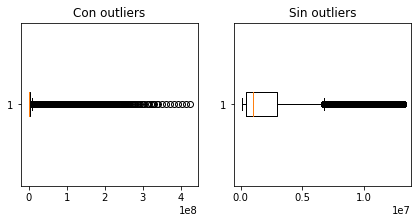

In [19]:
plt.subplots(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.boxplot(GBvideos_original["views"], vert=False)
plt.title("Con outliers")
plt.axis("on")
plt.subplot(1, 2, 2)
plt.boxplot(GBvideos_procesada["views"], vert=False)
plt.title("Sin outliers")
plt.axis("on")
plt.show()

### **GUARDAR EL DF PRE-PROCESADO**

In [20]:
GBvideos_procesada.to_csv('../data/GBvideos_cc50_202101_procesada.csv')